Geodesic distance transform
This notebook shows how Geodesic Discance Transform (GDT) using Fast Sweeping Method (FSM) can be implemented using Python. GDT can be thought of as a computation of shortest pathes on an image plane with a given cost function.

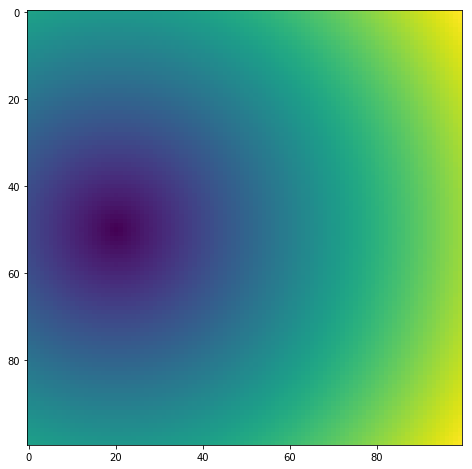

In [15]:
import numpy as np
from scipy.ndimage.morphology import distance_transform_edt
import skfmm
l = 100
x, y = np.indices((l, l))
center1 = (50, 20)
center2 = (28, 24)
center3 = (30, 50)
center4 = (60,48)
radius1, radius2, radius3, radius4 = 15, 12, 19, 12
circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2
# 3 circles
img = circle1 + circle2 + circle3 + circle4
mask = ~img.astype(bool)
img = img.astype(float)
#imshow(img, interpolation='nearest')
m = np.ones_like(img)
m[center1] = 0
mpplot.imshow(distance_transform_edt(m), interpolation='nearest')

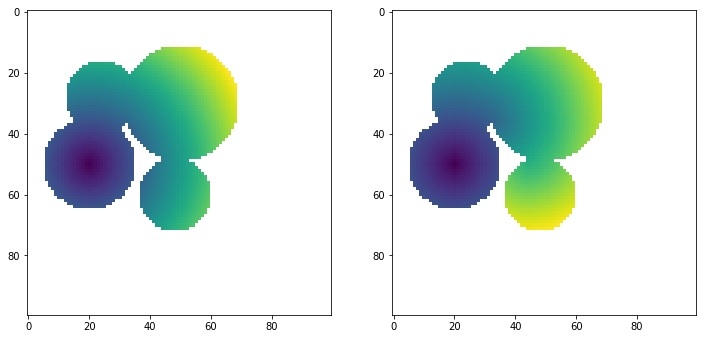

In [17]:
m = np.ma.masked_array(distance_transform_edt(m), mask)
mpplot.subplot(1, 2, 1)
mpplot.imshow(m, interpolation='nearest')
mpplot.subplot(1, 2, 2)
mpplot.imshow(skfmm.distance(m))

In [67]:
%load_ext Cython
import numpy as np
import scipy.ndimage as ndimage
import itertools as it
from skimage import io as skimio
import matplotlib.pyplot as mpplot
mpplot.rcParams['figure.figsize'] = (12,8)

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


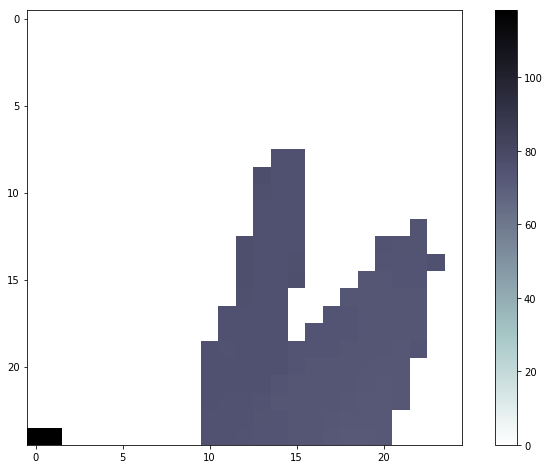

In [68]:
fig, ax = mpplot.subplots()
img = skimio.imread('image_D00000030.png').astype(float)
img /= 2000.
img[1. < img] = 0.
img *= 255.
img = img[80:180:4, 250:350:4]
#img[1e-3 > img] = 1
#img = 1 - img
#img = np.clip(img, 0, 1)
mpplot.imshow(img, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

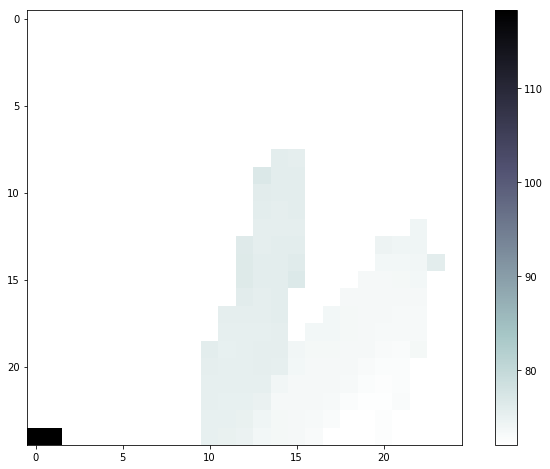

In [69]:
from scipy.ndimage.morphology import distance_transform_edt
import skfmm
mask = (1e-1 > img)
#masked_edt = np.ma.masked_array(distance_transform_edt(img), mask)
masked_edt = np.ma.masked_array(img, mask)
mpplot.imshow(masked_edt, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

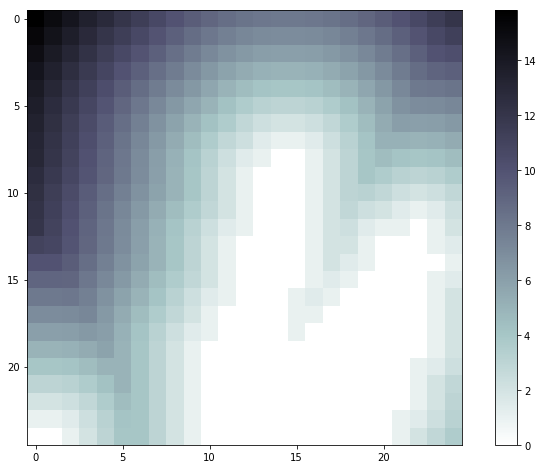

In [70]:
edt_out = distance_transform_edt(mask)
mpplot.imshow(edt_out, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

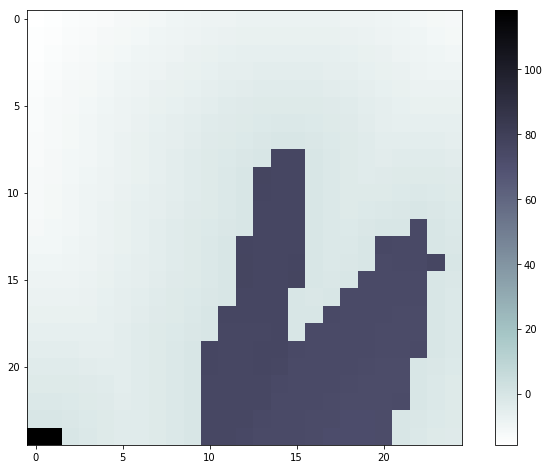

In [71]:
edt = img - edt_out
mpplot.imshow(edt, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

-3.0
(0.0, 3.0)
1.0


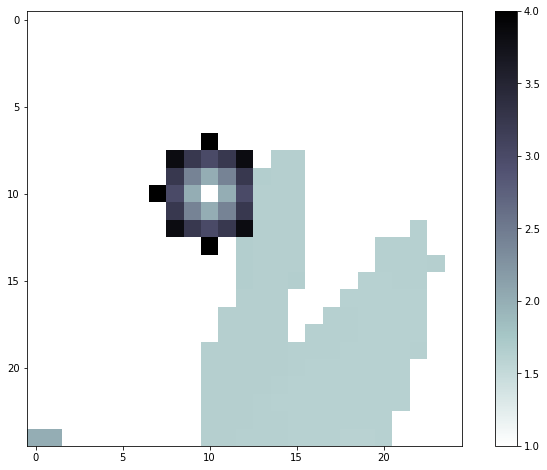

In [100]:
val = edt[10, 10]
print(val)
ring = np.ones_like(img)
ring[10, 10] = 0
ring = - distance_transform_edt(ring)
ring = np.ma.masked_array(ring, np.logical_and((val > ring), mask))
ring = np.max(ring) - ring
ring[~mask] = 0
print(np.min(ring), np.max(ring))
edt_ring = img / np.max(img) + ring + 1
print(np.min(edt_ring))
mpplot.imshow(edt_ring, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

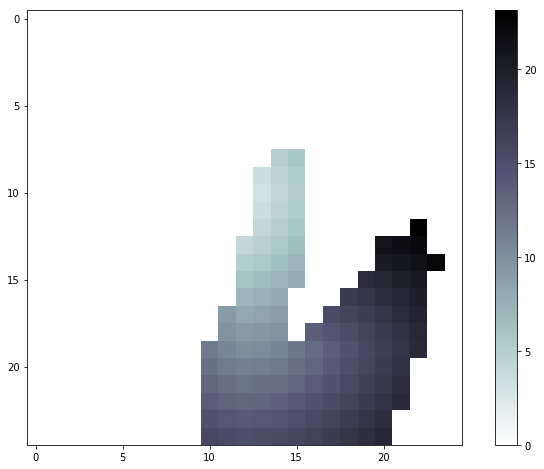

In [94]:
phi = edt_ring.copy()
phi[10, 10] = 0.
df = skfmm.distance(phi, dx=1, order=1)
df[mask] = 0
mpplot.imshow(df, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

-83.43860018001261


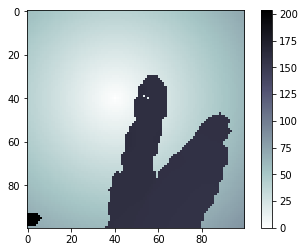

[[57.568542494923804 56.86591089385369 56.17245689653489 ...
  70.63476143421474 71.45565981523414 72.28113354878694]
 [56.86591089385369 56.154328932550705 55.45181356024793 ...
  70.06518659932803 70.8927750200262 71.7248188403477]
 [56.17245689653489 55.45181356024793 54.74011537017761 ...
  69.5054742338158 70.33974329343886 71.178344238091]
 ...
 [202.50360018001263 202.50360018001263 202.50360018001263 ...
  81.61017305526642 82.32035415564789 83.03657720797473]
 [202.2486001800126 202.2486001800126 202.2486001800126 ...
  82.32035415564789 83.02438661763951 83.73451516749222]
 [72.28113354878694 71.7248188403477 71.178344238091 ...
  83.03657720797473 83.73451516749222 84.43860018001261]]


In [82]:
val = edt[40, 40]
print(val)
if 0 > val:
    phi = np.ma.masked_array(
        # distance_transform_edt(0 < edt - val) + istep,
        edt - val + 1,
        (val > edt))
else:
    phi = masked_edt.copy()
phi[40, 40] = 0.
mpplot.imshow(phi, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()
print(phi)

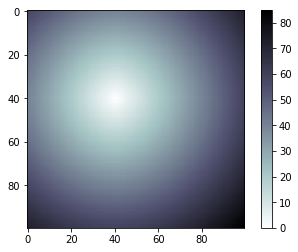

In [83]:
df = skfmm.distance(phi, dx=1, order=1)
mpplot.imshow(df, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

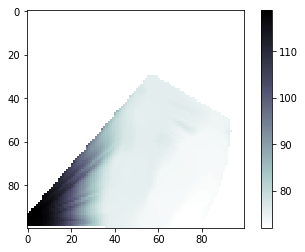

In [28]:
from scipy.interpolate import griddata
xx, yy = np.mgrid[0:100, 0:100]
cond = np.where(1e-2 < img)
ipos = np.asarray(cond).T
val = img[cond]
pose = np.array([[40, 40]])
vout = np.array([50])
#ipos = np.vstack((ipos, pose))
#val = np.hstack((val, vout))
grid2 = griddata(ipos, val, (xx, yy), method='cubic')
mpplot.imshow(grid2, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()

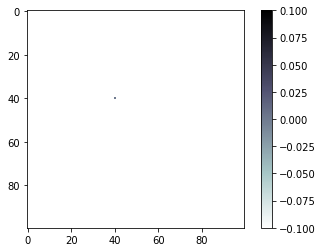

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [10]:
import skfmm
phi = masked_edt.copy()
#phi[120, 300] = 0.
#phi[40, 55] = 0.
phi[40, 40] = 0.
d = skfmm.distance(phi, dx=1e-1)
#mpplot.contour(d, 30, origin='image')
mpplot.imshow(d, cmap=mpplot.cm.bone_r)
mpplot.colorbar()
mpplot.show()
print(d)

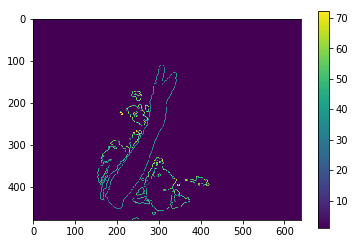

In [3]:
fig, ax = mpplot.subplots()
Cost = ndimage.gaussian_gradient_magnitude(img, 0.5)
#Cost = np.multiply(Cost, img)
#Cost = 1. + Cost*200.
Cost = 1. + Cost
mpplot.imshow(Cost)
mpplot.colorbar()
mpplot.show()

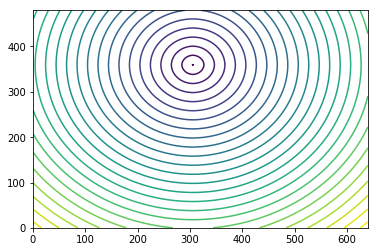

In [4]:
import skfmm
phi = np.ones_like(Cost) * np.max(Cost) * 100
gpi = np.where(1. < Cost)
phi[gpi] = Cost[gpi]
phi[120, 305] = -100.
d = skfmm.distance(phi, dx=1e-2)
mpplot.contour(d, 30, origin='image')
mpplot.show()

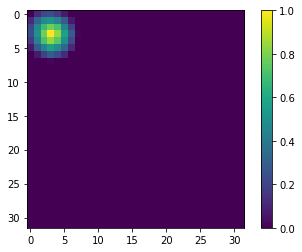

In [5]:
import skfmm
X, Y = np.meshgrid(np.linspace(-1,1,32), np.linspace(-1,1,32))
phi = (X+0.8)**2+(Y+0.8)**2 - 0.01
d = skfmm.distance(phi, dx=2.0/5)
d[1 < d] = 1
d = 1 - d
d /= np.max(d)
#mpplot.contour(d, 30)
mpplot.imshow(d)
mpplot.colorbar()
mpplot.show()

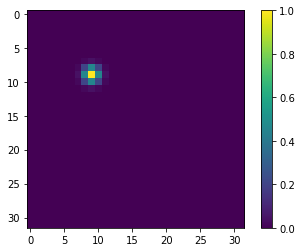

In [6]:
import scipy.ndimage
sp = np.zeros((32, 32))
sp[9, 9] = 1
sp = scipy.ndimage.gaussian_filter(sp, sigma=0.8)
sp /= np.max(sp)
mpplot.imshow(sp)
mpplot.colorbar()
mpplot.show()

1.0


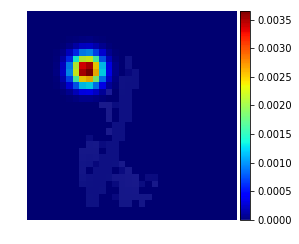

In [12]:
import scipy.ndimage
from cv2 import resize as cv2resize
from mpl_toolkits.axes_grid1 import make_axes_locatable
sp = np.zeros((128, 128))
sp[36, 36] = 1
sp = scipy.ndimage.gaussian_filter(sp, sigma=6.4)
print(np.sum(sp))
sp = cv2resize(sp, (32, 32))
img32 = cv2resize(img, (32, 32))
fig = mpplot.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
#fig.subplots_adjust(0, 0, 1, 1)
ax.imshow(img32, cmap='bone', interpolation='nearest')

def transparent_cmap(cmap, N=255):
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.99, N+4)
    return mycmap

#ax.imshow(sp, cmap=transparent_cmap(mpplot.cm.jet))
img_sp = ax.imshow(sp, cmap='jet', alpha=0.9)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img_sp, cax=cax)
mpplot.show()

In [8]:
a = np.array([[0,1],[2,3]])
b = np.array([[4,5],[6,7]])
c = np.stack((a, b), axis=2)
print(a)
print(c)

[[0 1]
 [2 3]]
[[[0 4]
  [1 5]]

 [[2 6]
  [3 7]]]


In [9]:
%%cython
from libc.math cimport sqrt

def sweep(double[:,:] A, double[:,:] Cost):
    cdef int i, j
    cdef float t0, t1, t2, C, max_diff = 0.0
    for i in xrange(1, A.shape[0]):
        for j in xrange(1, A.shape[1]):
            t1, t2 = A[i, j-1], A[i-1, j]
            C = Cost[i, j]
            if abs(t1-t2) > C:
                t0 = min(t1, t2) + C  # handle degenerate case
            else:    
                t0 = 0.5*(t1 + t2 + sqrt(2*C**2 - (t1-t2)**2))
            max_diff = max(max_diff, A[i, j] - t0)
            A[i, j] = min(A[i, j], t0)
    return max_diff

In [10]:
def GDT(A, C):
    A = A.copy()
    sweeps = [A, A[:,::-1], A[::-1], A[::-1,::-1]]
    costs = [C, C[:,::-1], C[::-1], C[::-1,::-1]]
    for i, (a, c) in enumerate(it.cycle(zip(sweeps, costs))):
        print(i)
        if sweep(a, c) < 1.0 or i >= 40:
            break
    return A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


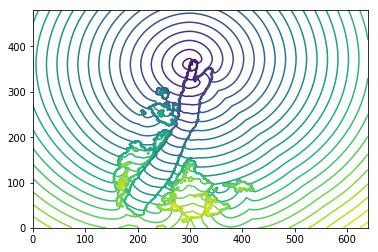

In [11]:
A = np.zeros_like(Cost) # create distance accumulation array
A[:] = 1e5           # fill it with large values to mark
                     # cells with unknown distance
A[120, 300] = 0.      # set the source

A = GDT(A, Cost)
mpplot.contour(A, 30, origin='image')
mpplot.show()